This is the code that creates the figures in https://docs.google.com/presentation/d/1YRaCc-aveGODktLXMzJzDUvZj1uPPnYaC97m5QPi9tQ/edit?usp=sharing

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from preprocessing import EraseDuplicatedElect, GetHzStartEndIdxByElec, GetHzStartEndIdxByEMG, signal_mV, calc_y
from PlotFunction import Loc, Int, Ang, All, SIMPLE

# PPT fig - 물리적 압력에 따른 주변부 신호 변화 - 전체

0 EMG_test_20240610181111_3.txt
[-0.02588235 -0.02588235 -0.02588235 ... -0.05176471 -0.02588235
 -0.02588235]
1 EMG_test_20240610181111_4.txt
[-0.07764706 -0.07764706 -0.10352941 ... -0.05176471 -0.05176471
 -0.05176471]
2 Impulse_0_20240610181107_2_quadriceps femoris_right.txt


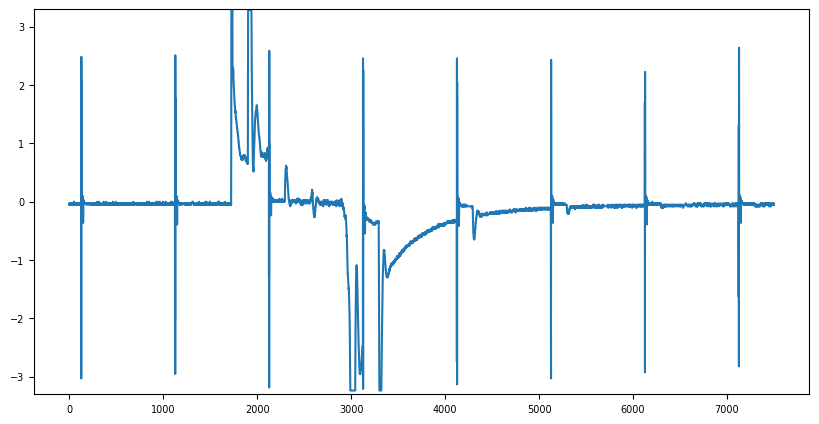

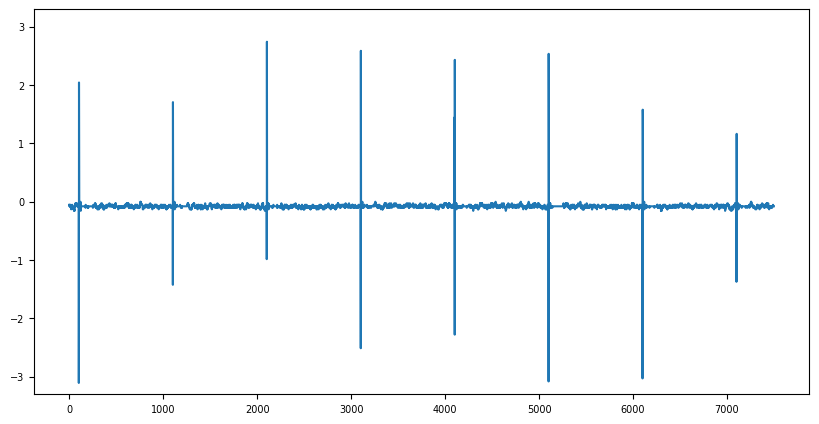

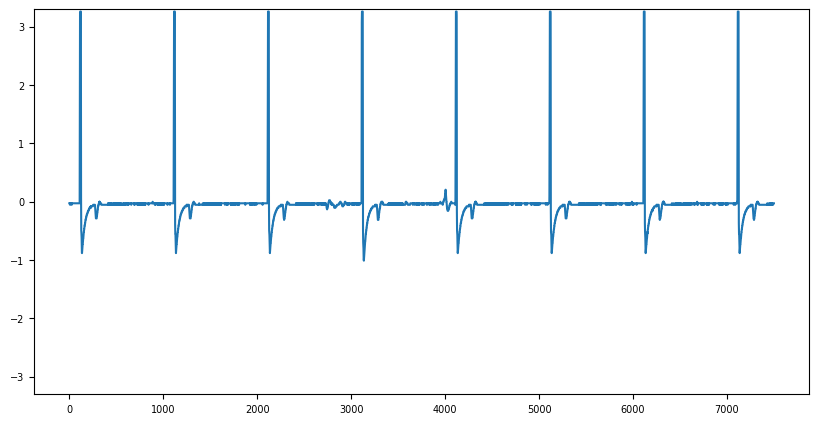

In [4]:
%matplotlib inline
a,b = 2000,2000 + 7500
dir_path  = './Result_experiments/EMG_test_240610_/glove/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(10,5))
    if 'EMG' in file:
        tmp_a, tmp_b = a+300, b+300
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        n = 0
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.3, 3.3)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[a:b])
        plt.ylim(-3.3, 3.3)
            
plt.show()

# PPT fig - 실험 2 FIg 1

# PPT fig - 물리적 압력에 따른 주변부 신호 변화 / 앞단

0 EMG_test_20240610181111_3.txt
[-0.02588235 -0.02588235 -0.02588235 ... -0.05176471 -0.02588235
 -0.02588235]
1 EMG_test_20240610181111_4.txt
[-0.07764706 -0.07764706 -0.10352941 ... -0.05176471 -0.05176471
 -0.05176471]
2 Impulse_0_20240610181107_2_quadriceps femoris_right.txt


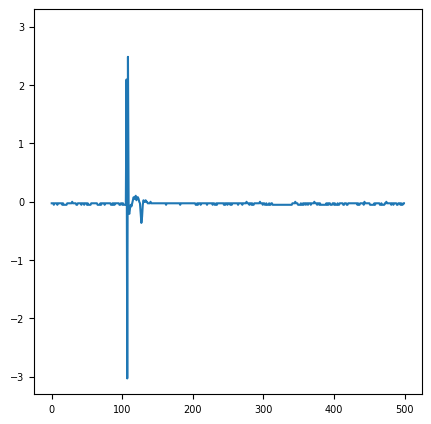

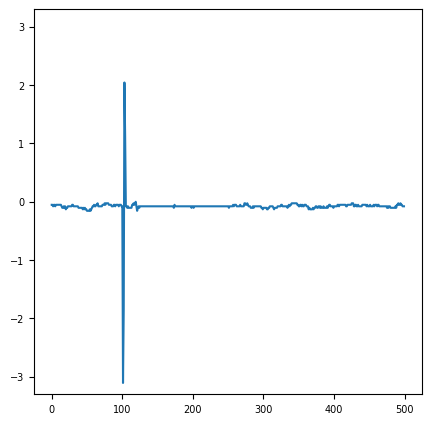

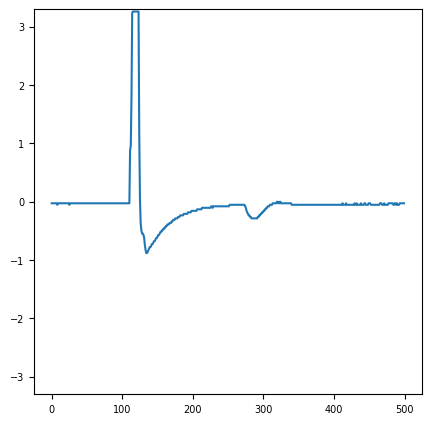

In [5]:
%matplotlib inline
a,b = 2000,2000 + 500   # 5000, 7000
dir_path  = './Result_experiments/EMG_test_240610_/glove/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(5,5))
    if 'EMG' in file:
        tmp_a, tmp_b = a+300, b+300
        if '_3' in file:
            tmp_a += 20
            tmp_b += 20
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        # elect_raw = np.array(elect_raw)

        print(emg_raw)
        n = 0
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.3,3.3)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)
        emg_raw = signal_mV(emg_raw,500)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[a:b])
        plt.ylim(-3.3,3.3)
            
plt.show()

# PPT fig - 물리적 압력에 따른 주변부 신호 변화 - 뒷단

0 EMG_test_20240610181111_3.txt
[-0.02588235 -0.02588235 -0.02588235 ... -0.05176471 -0.02588235
 -0.02588235]
1 EMG_test_20240610181111_4.txt
[-0.07764706 -0.07764706 -0.10352941 ... -0.05176471 -0.05176471
 -0.05176471]
2 Impulse_0_20240610181107_2_quadriceps femoris_right.txt


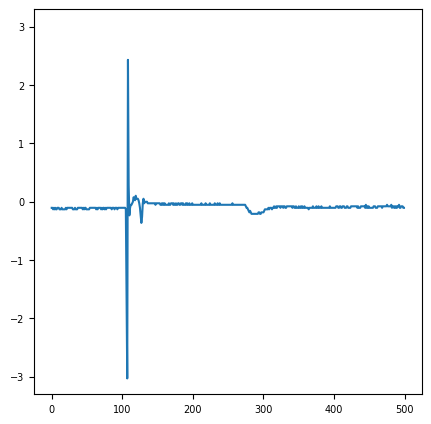

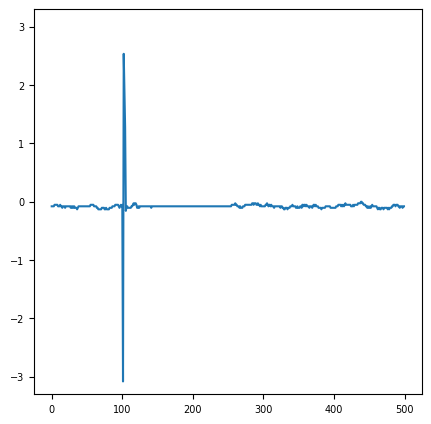

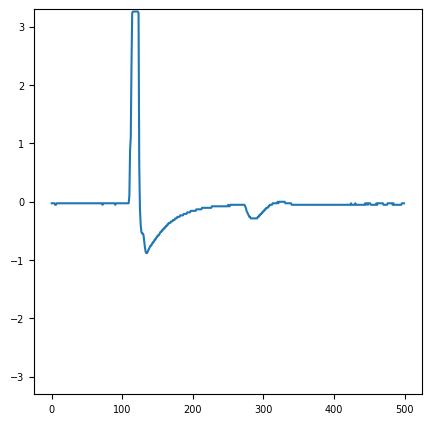

In [6]:
%matplotlib inline
a,b = 7000,7000 + 500   # 5000, 7000
dir_path  = './Result_experiments/EMG_test_240610_/glove/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(5,5))
    if 'EMG' in file:
        tmp_a, tmp_b = a+300, b+300
        if '_3' in file:
            tmp_a += 20
            tmp_b += 20
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        # elect_raw = np.array(elect_raw)

        print(emg_raw)
        n = 0
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.3,3.3)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)
        emg_raw = signal_mV(emg_raw,500)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[a:b])
        plt.ylim(-3.3,3.3)
            
plt.show()

# PPT fig - 거리에 따른 주변부 신호 변화

## 확대

0 EMG_test_20240610181111_3.txt
[-0.02588235 -0.02588235 -0.02588235 ... -0.05176471 -0.02588235
 -0.02588235]
1 EMG_test_20240610181111_4.txt
[-0.07764706 -0.07764706 -0.10352941 ... -0.05176471 -0.05176471
 -0.05176471]
2 Impulse_0_20240610181107_2_quadriceps femoris_right.txt


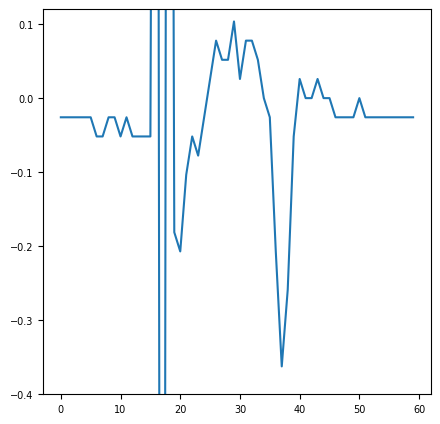

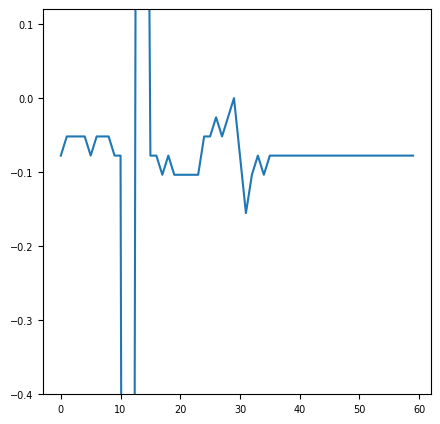

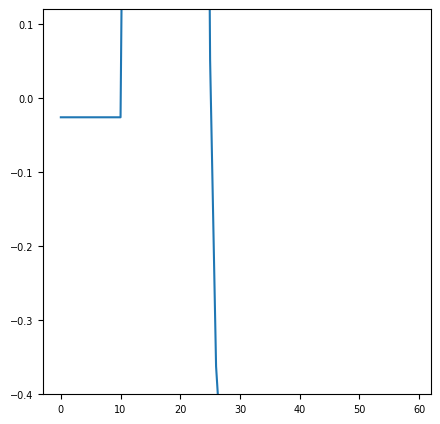

In [7]:
%matplotlib inline
a,b = 2400,2400+60
dir_path  = './Result_experiments/EMG_test_240610_/glove/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(5,5))
    if 'EMG' in file:
        tmp_a, tmp_b = a,b
        if '_3' in file:
            tmp_a += 10
            tmp_b += 10
        if '_4' in file:
            tmp_a -= 10
            tmp_b -= 10

        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        n = 0
        plt.plot(emg_raw[tmp_a:tmp_b])
        # plt.ylim(110,130)
        plt.ylim(-0.4,0.12)
        
    else:
        
        tmp_a, tmp_b = a,b
        tmp_a -= 300
        tmp_b -= 300

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        elect_raw = np.array(elect_raw)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-0.4,0.12)
        # plt.ylim(110,130)
            
plt.show()

## 전체

0 EMG_test_20240610181111_3.txt
[-0.02588235 -0.02588235 -0.02588235 ... -0.05176471 -0.02588235
 -0.02588235]
1 EMG_test_20240610181111_4.txt
[-0.07764706 -0.07764706 -0.10352941 ... -0.05176471 -0.05176471
 -0.05176471]
2 Impulse_0_20240610181107_2_quadriceps femoris_right.txt


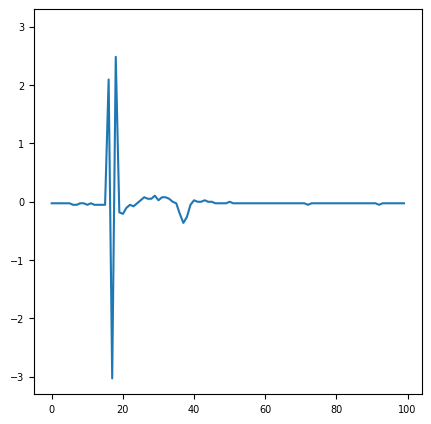

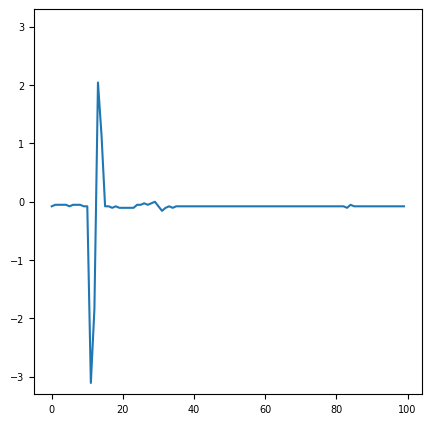

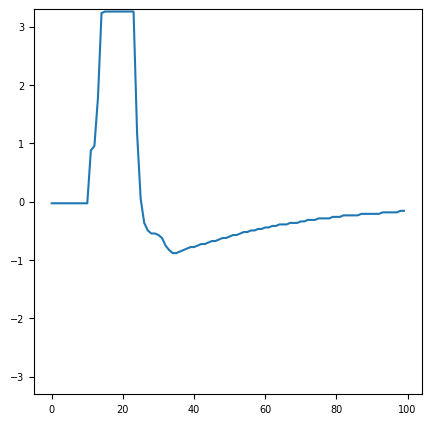

In [8]:
%matplotlib inline
a,b = 2400,2400+100
dir_path  = './Result_experiments/EMG_test_240610_/glove/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(5,5))
    if 'EMG' in file:
        tmp_a, tmp_b = a,b
        if '_3' in file:
            tmp_a += 10
            tmp_b += 10
        if '_4' in file:
            tmp_a -= 10
            tmp_b -= 10

        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        n = 0
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.3, 3.3)
    else:
        
        tmp_a, tmp_b = a,b
        tmp_a -= 300
        tmp_b -= 300

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        elect_raw = np.array(elect_raw)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.3, 3.3)
            
plt.show()

# PPT fig - 실험 2 Fig 2

0 EMG_test_20240610181357_3.txt
[-0.02588235 -0.02588235 -0.02588235 ...  0.          0.02588235
  0.        ]
1 EMG_test_20240610181357_4.txt
[ 0.05176471  0.07764706  0.05176471 ... -0.07764706 -0.07764706
 -0.07764706]
2 Impulse_0_20240610181353_2_quadriceps femoris_right.txt


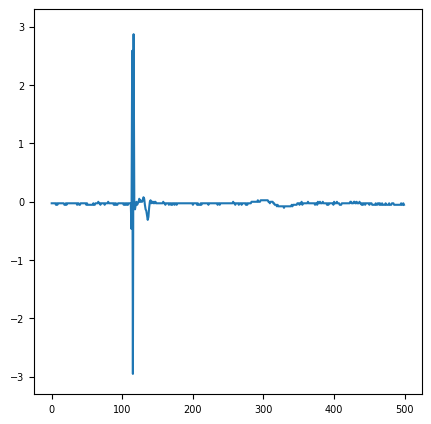

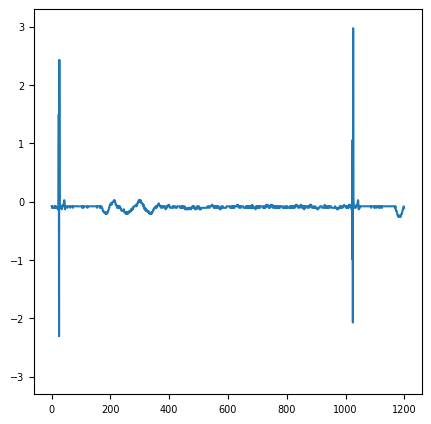

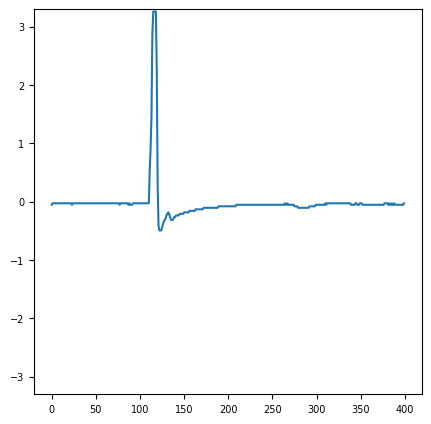

In [9]:
%matplotlib inline
dir_path  = './Result_experiments/EMG_test_240610_/14/'
for  i,file in  enumerate(sorted([x for x in os.listdir(dir_path) if x.endswith('.txt') and '이후' not in x])):
    print(i,file)

    plt.figure(figsize=(5,5))
    if 'EMG' in file:
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        n = 0
        if '_3' in file:
            plt.plot(emg_raw[600+200+35-100:600+200+35+500-100])
        else:
            plt.plot(emg_raw[600+200:2000])
        # plt.ylim(0,255)
        plt.ylim(-3.3,3.3)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)
        emg_raw = signal_mV(emg_raw,500)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        elect_fixed = np.array(elect_fixed)
        n = 850
        plt.plot(emg_raw[100-100:500-100])
        # plt.ylim(0,255)
        plt.ylim(-3.3,3.3)
plt.show()

# 추가 실험